<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/introductionDataS_pandasNumpyScipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **numpy** 

# **pandas**

# **SKlearn**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('ggplot')

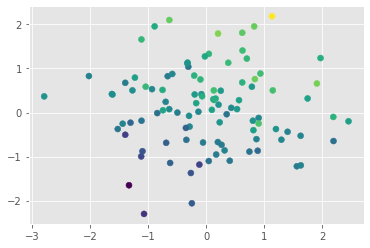

In [2]:
# Create random dataset
from sklearn.datasets import make_classification, make_regression, make_blobs
x, y = make_classification(n_samples = 100,
    n_features = 3,
    n_informative = 3, 
    n_redundant = 0,
    n_classes = 4,
    weights = [.25, .15, .2, .3],
    random_state = 1)
x1, y1, coed = make_regression(n_samples = 100,
    n_features = 3,
    n_informative = 3,
    n_targets = 1,
    noise = 0.0,
    coef = True,
    random_state = 1)
x2, y2 = make_blobs(n_samples = 100,
    n_features = 2,
    centers = 3,
    cluster_std = 0.5,
    shuffle = True,
    random_state = 1)

plt.scatter(x1[:,0], x1[:,1], c=y1)
plt.show()

In [3]:
# Random numbers
np.random.seed(0)
print(
np.random.random(3), # create random number between 0 1 - - it is normal distribution
np.random.randint(1,40,5), # create random number (from,to,num)
sep = '\n')

[0.5488135  0.71518937 0.60276338]
[ 4 10 20 22 37]


columns  Index(['account number', 'name', 'sku', 'quantity', 'unit price', 'ext price',
       'date'],
      dtype='object')

columns  Index(['account number', 'name', 'sku', 'quantity', 'priceu', 'exprice',
       'date'],
      dtype='object')

cov:  [[208.49238648   8.70238503]
 [  8.70238503 670.97925946]]

Covarinace matrix of arr: 
 [[0.33333333 0.83333333 0.5       ]
 [0.83333333 2.33333333 1.5       ]
 [0.5        1.5        1.        ]]


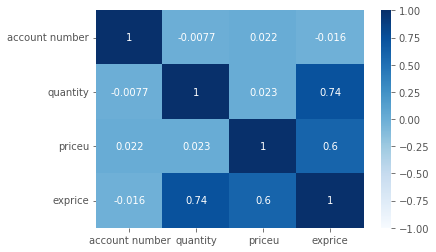

In [15]:
# ........................................
# Read / rename / covariance
# ........................................
import pandas as pd
import numpy as np
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")

print('columns ',df.columns)  # return columns name 

df = df.rename(columns = {'unit price':'priceu','ext price':'exprice'})
print('\ncolumns ',df.columns)  # return columns name 

# ============================================================================
# The Numpy cov() function is used to measure the strength of correlation
# between two or more than two sets of variables is called covariance.
arr = np.array([[1, 1, 2], [1, 2, 4], [3, 4, 5]])
print('\ncov: ',np.cov(df.quantity, df.priceu)) # ????
print("\nCovarinace matrix of arr: \n", np.cov(arr))

# ============================================================================
corr = df.corr() # depict correlation between numeric values
sb.heatmap(corr, annot = True, cmap='Blues', xticklabels = corr.columns, yticklabels = corr.columns, vmin = -1, vmax = +1)
plt.show()

In [16]:
df

,account number,name,sku,quantity,priceu,exprice,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55
...,...,...,...,...,...,...,...
1495,737550,"Fritsch, Russel and Anderson",S1-06532,12,55.80,669.60,2014-12-30 13:38:13
1496,786968,"Frami, Hills and Schmidt",S1-06532,37,13.14,486.18,2014-12-30 21:42:17
1497,239344,Stokes LLC,S2-10342,14,38.75,542.50,2014-12-30 22:45:19
1498,642753,Pollich LLC,S2-82423,3,65.97,197.91,2014-12-31 10:36:24


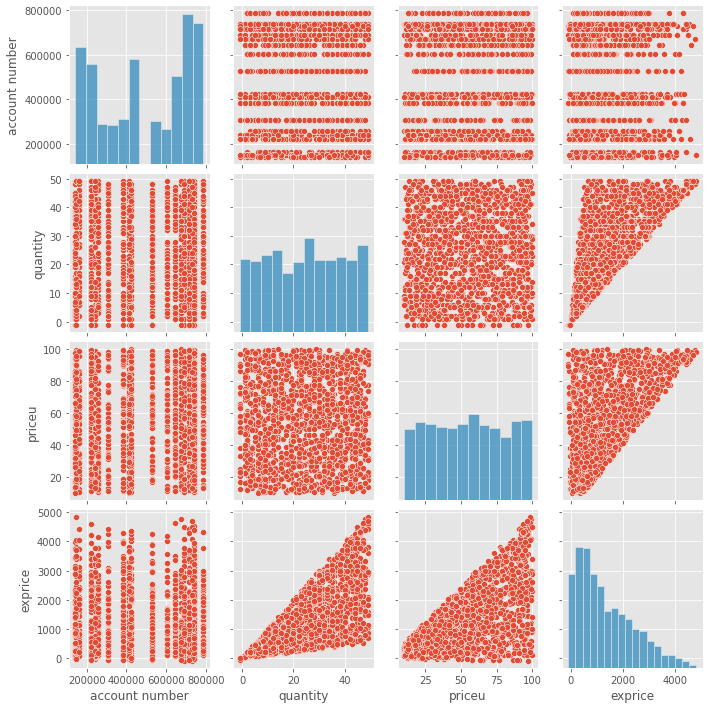

In [ ]:
sb.pairplot(df)

# Correlation

find relation between two feature 

In [18]:
# pearson 
# measures the strength of the linear relationship between two variables
#  It has a value between -1 to 1, 
# with a value of -1 meaning a total negative linear correlation,
# 0 being no correlation, and + 1 meaning a total positive correlation
# R = cov (X, Y) / (std(x) stx(y))
from scipy.stats import pearsonr
pearson_coef, p_value = pearsonr(df.exprice, df.priceu)
print(f'coef :{pearson_coef}, p_value: {p_value}') 

coef :0.5971385745771371, p_value: 1.2668652524070644e-145


In [ ]:
# SPEARman correlation
# measures the strength and direction of monotonic association between two variables.
'''
The Spearman correlation is less sensitive than the Pearson correlation to strong outliers that are in the tails of both samples.
That is because Spearman's ρ limits the outlier to the value of its rank.
'''
from scipy.stats import spearmanr
spearman_coef, p_value = spearmanr(df.exprice, df.priceu)
print(f'coef :{spearman_coef}, p_value: {p_value}')

coef :0.5741825250806364, p_value: 2.7360366114796826e-132


In [ ]:
# chi square TEST 
# for categorical data
# -------------------------------------------------
# Investigate whether events are independent or relevant
# -------------------------------------------------
# P_VALUE : It is a way to reject the null hypothesis and accept the alternative hypothesis 
# if p_value > 0.05 fail to reject null hypothesis
# if p_value < 0.05 we can reject null hypothesis
# -------------------------------------------------
# Expectadet Table 
# -------------------------------------------------
# Degree of freedom 
# -------------------------------------------------
# chi2 = Sum [(Observed_data - expectadet_data)**2/expectadet_data]
# -------------------------------------------------
from scipy.stats import chi2_contingency

observed_data = pd.crosstab(df.name, df.sku) 
chi2, p_value, degreeOfFreedom, expected = chi2_contingency(observed_data.values)
if p_value > 0.05:
  print('null hypothesis is correct')
else:
  print('null hypothesis is rejected')

null hypothesis is correct


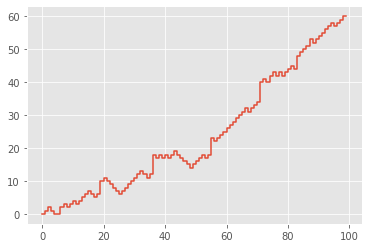

In [ ]:
# Random walk 
# if dice 1 or 2  --> step -1
# if dice 3 4 5 --> step +1
# if dice is 6 --> step + next dice number
t = 100
step = 0
steps = []
while t > 0 :
  dice = np.random.randint(1,7)
  if dice <3:
    step = max(0, step-1)
  elif dice <= 5:
    step += 1
  else:
    num = np.random.randint(1,7)
    step += num
  steps.append(step)
  t -= 1

plt.step(np.arange(100),steps)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


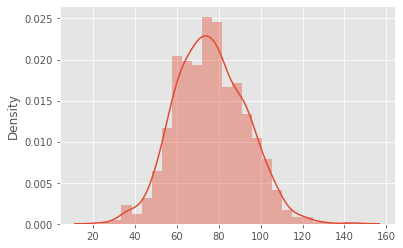

76.113 16.724778952201433


In [ ]:
report = np.empty(0)
for _ in range(1000):
  t = 100
  step = 0
  steps = []
  while t > 0 :
    dice = np.random.randint(1,7)
    if dice <3:
      step = max(0, step-1)
    elif dice <= 5:
      step += 1
    else:
      num = np.random.randint(1,7)
      step += num
    steps.append(step)
    t -= 1
  report = np.append(report, steps[-1])
sb.distplot(report)
plt.show()
print(np.mean(report),np.std(report))

# PREprocessing

In [3]:
import pandas as pd
from seaborn import load_dataset
data3 = load_dataset("mpg")

data = pd.read_csv('bank.csv', sep=';')

data.describe()  # describe the dataset

data = data.rename({'education':'edu'})

data.columns # columns of dataset

data.info() # info about dataset

data.isnull() # return objects of dataset True for null 

data.fillna({'job':'unemployd','balance':'zero'}) # fill na values of columns dataset

data.fillna(method = 'ffill') # fill na values with previous data in dataset
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 635.8+ KB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
data[data.duplicated()]                       # returns rows with duplicate data
data.drop_duplicates()                        # drops every duplicated data
data.drop_duplicates(['job'])                 # drops job columns duplicated data
data.reset_index(drop = True, inplace = True) # reset index and drop previous indexes

In [5]:
data.job.value_counts() # Count special columns

# Group by 
new_data = data.groupby(data['job']) # set each job in index and recreate dataset based on them
print(new_data.mean())

# crosstab 
pd.crosstab(data.job, data.housing) # job as index and housing as columns

                     age      balance        day    duration  campaign  \
job                                                                      
admin.         39.682008  1226.736402  16.324268  234.669456  2.631799   
blue-collar    40.156448  1085.161734  15.482030  278.161734  2.846723   
entrepreneur   42.011905  1645.125000  15.255952  285.476190  2.589286   
housemaid      47.339286  2083.803571  15.294643  292.633929  2.500000   
management     40.540764  1766.928793  16.254902  260.536636  2.973168   
retired        61.869565  2319.191304  15.556522  285.656522  2.465217   
self-employed  41.453552  1392.409836  16.180328  264.125683  3.278689   
services       38.570743  1103.956835  15.515588  262.486811  2.822542   
student        26.821429  1543.821429  16.392857  248.690476  2.392857   
technician     39.470052  1330.996094  16.183594  252.178385  2.731771   
unemployed     40.906250  1089.421875  16.093750  301.265625  2.679688   
unknown        48.105263  1501.710526 

housing,no,yes
job,,
admin.,176,302
blue-collar,251,695
entrepreneur,74,94
housemaid,73,39
management,466,503
retired,180,50
self-employed,95,88
services,132,285
student,64,20


In [6]:
# pivot table 
pd.pivot_table(data, index = 'marital', columns = 'loan') 
# set selected row and column to mpre info

age                 balance              campaign            \
loan             no        yes           no         yes        no       yes   
marital                                                                       
divorced  45.593607  44.900000  1170.778539  886.900000  2.621005  2.522222   
married   43.670648  42.335541  1554.146758  992.578366  2.801195  3.086093   
single    33.913168  34.027027  1567.132634  704.736486  2.766221  2.648649   

                day               duration                  pdays             \
loan             no        yes          no         yes         no        yes   
marital                                                                        
divorced  15.769406  15.677778  283.052511  260.644444  43.865297  14.311111   
married   15.901024  15.931567  256.473123  256.816777  39.261945  34.353201   
single    16.070611  15.567568  274.746183  273.574324  44.013359  37.608108   

          previous            
loan            no       yes  
marital                       
divorced  0.504566  0.122222  
married   0.529010  0.467991  
single    0.646947  0.614865

In [7]:
# convert categorical data into numeric data
data2 = data.drop(['job','marital','education','month','age', 'default', 'balance', 'housing', 'loan', 'contact', 'day',],axis = 1)

print(data2.poutcome.unique())
pd.get_dummies(data2)

['unknown' 'failure' 'other' 'success']


,duration,campaign,pdays,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,79,1,-1,0,0,0,0,1,1,0
1,220,1,339,4,1,0,0,0,1,0
2,185,1,330,1,1,0,0,0,1,0
3,199,4,-1,0,0,0,0,1,1,0
4,226,1,-1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
4516,329,5,-1,0,0,0,0,1,1,0
4517,153,1,-1,0,0,0,0,1,1,0
4518,151,11,-1,0,0,0,0,1,1,0
4519,129,4,211,3,0,1,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([1.61764706, 2.05882353, 2.35294118, ..., 5.58823529, 1.32352941,
       3.67647059])

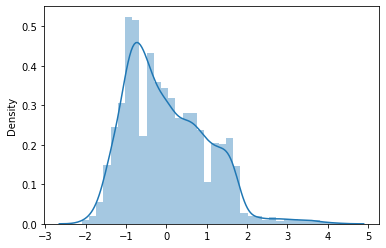

In [8]:
# normalize data 
import seaborn as sb
from sklearn.preprocessing import scale, normalize, minmax_scale
# scale is Z score  x-mean / std 
# normalize  x / |x| - > norm in manhatan its sum(|x1| + |x2| + ...)
# in euclidance is sqrt(sum(x1**2 + x2**2 +...))
# minmax_scale distributed data in min and max scale 
scale_age = scale(data.age)
sb.distplot(scale_age)
normalize_data = normalize([data.duration,data.age], norm='l1', axis = 1)
scaled_data = minmax_scale(data.age, feature_range = (0,10))
scaled_data

In [10]:
# quartile 
import numpy as np
df = pd.DataFrame(np.array([1,5,6,9,12,25,220]))

def percentile(data,k):
    n = len(data)
    p = (k * n)/100
    c = p - int(p)
    if c: # p isnt integer
      return data[int(p)]
    else: # p is integer
      return (data[int(p)] + data[int(p) - 1]) / 2
    return p
percentile([1,5,6,9,12,25,220],50)
df.quantile(0.5)

0    9.0
Name: 0.5, dtype: float64

In [ ]:
# who is the OUTLIER?
up_extrem = q3 + (1.5 * iqr) # iqr == interquartile range
down_extrem = q1 - (1.5 * iqr) # iqr == interquartile range
# if some data greater than up_extrem or lower than down extrem, its OUTLIER
# box plots are best way for detecting and visualizing outliers

In [12]:
# design style of table
data.head().style.set_table_styles(
    [{'selector': 'tr:hover',
      'props': 'background-color: yellow; font-size: 1em;'}])


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Iris dataset

In [7]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
print(f'shape of data = {iris.data.shape}\n iris describe = {iris.DESCR}')


shape of data = (150, 4)
 iris describe = .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ========

In [17]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


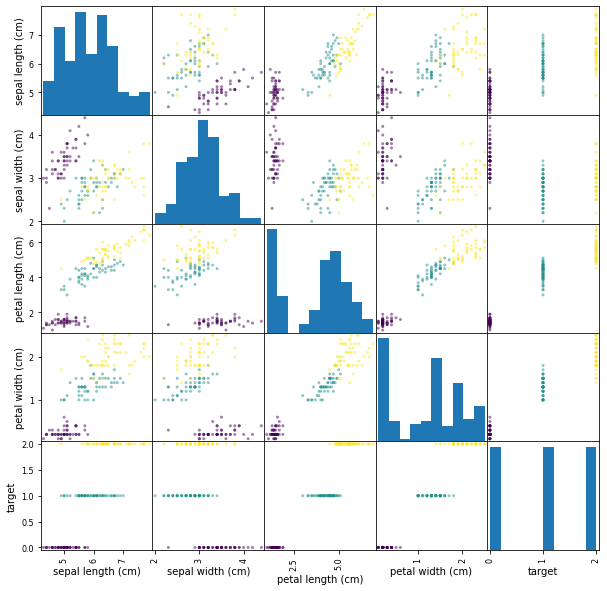

In [18]:
pd.plotting.scatter_matrix(iris_df, c=iris.target,figsize = [10,10])
plt.show()

------
# machin learning algorithms
------

In [8]:
# KNN 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 42, stratify = y)


knn = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 1)
'''
p   in the mikowski is like ranke of tensor
if p = 1 --> its turn to manhattan distance
if p = 2 --> its turn to euclidance distance
if p = inf --> its chebyshev.  like king moving in chess
'''

knn.fit(x_train, y_train)
x_n = np.array([[5,4,3,2]])
ypred = knn.predict(x_test)
print(knn.score(x_test, y_test))
print(list(zip(ypred,y_train)))

0.9333333333333333
[(2, 1), (1, 1), (1, 0), (1, 2), (2, 1), (2, 2), (1, 0), (1, 0), (0, 0), (2, 2), (0, 2), (0, 0), (2, 0), (2, 1), (0, 1), (2, 2), (1, 0), (0, 0), (0, 2), (0, 1), (1, 0), (0, 2), (1, 2), (2, 2), (1, 1), (1, 0), (1, 0), (1, 0), (1, 1), (0, 1), (2, 0), (2, 0), (1, 1), (0, 1), (2, 0), (0, 0), (0, 1), (0, 2), (0, 2), (1, 0), (1, 2), (0, 0), (1, 2), (2, 0), (1, 2)]


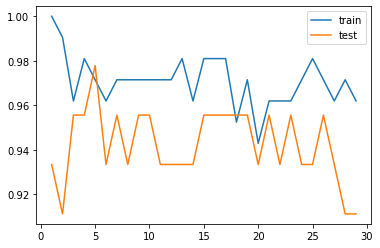

In [9]:
neighbors = np.arange(1,30)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))

for i,j in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = j)
  knn.fit(x_train, y_train)
  train_acc[i] = knn.score(x_train, y_train)
  test_acc[i] = knn.score(x_test, y_test)

plt.plot(neighbors, train_acc, label = 'train')
plt.plot(neighbors, test_acc, label = 'test')
plt.legend()

def kmost(x,y,k):
  neighbors = np.arange(1,k)
  train_acc = np.empty(len(neighbors))
  test_acc = np.empty(len(neighbors))

  for i,j in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = j)
    knn.fit(x, y)
    train_acc[i] = knn.score(x, y)
    test_acc[i] = knn.score(x, y)

  plt.plot(neighbors, train_acc, label = 'train')
  plt.plot(neighbors, test_acc, label = 'test')
  plt.legend()

In [19]:
# decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
ypred = dtc.predict(x_test)

metrics.accuracy_score(y_test, ypred)
# or use dtc.score

0.9777777777777777

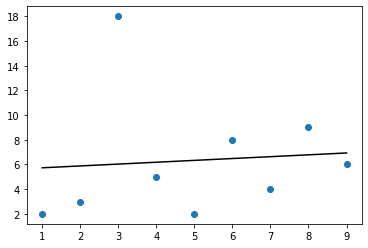

In [20]:
# regression 
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression

x = np.arange(1,10).reshape(-1,1)
y = np.array([2,3,18,5,2,8,4,9,6]).reshape(-1,1)


reg = LinearRegression()
reg.fit(x,y)

ypred = reg.predict(x)

plt.scatter(x,y)
plt.plot(x,ypred, c = 'k')
plt.show()


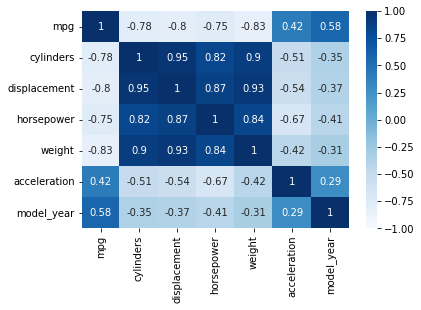

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [37]:
corr = data3.corr() # depict correlation between numeric values
sb.heatmap(corr, annot = True, cmap='Blues', xticklabels = corr.columns, yticklabels = corr.columns, vmin = -1, vmax = +1)
plt.show()
data3

0.5191553121718141  Scores  [ 0.82373409  0.74317391  0.77211659  0.66633808 -0.4095861 ]


10754.525643224079

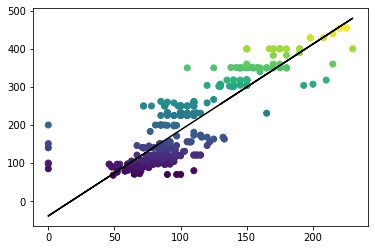

In [46]:
data3 = data3.fillna(0) 
a = np.array(data3[data3.columns[3]]).reshape(-1,1)
b = np.array(data3[data3.columns[2]]).reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(a,b)
c = lin_reg.predict(a)
lin_reg.score(a,b)

plt.scatter(a,b, c = b)  #(data3.index,data3[data3.columns[3]], c = data3[data3.columns[6]])
plt.plot(a,c,c = 'k')

# kfold cross validation 
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
cv_score = cross_val_score(reg, a, b, cv=5)
print(np.mean(cv_score),' Scores ',cv_score)


mean_squared_error(a, c)

In [49]:
from sklearn.metrics import mean_squared_error

y_true = [3, 3, 2, 2]
y_pred = [2.5, 0.0, 2, 8]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print(f'mse {mse} / Rmse {rmse}')

mse 11.3125 / Rmse 3.3634060117684275


[-0.78188352 -1.83551559  0.3180678 ]
69.7699075383756


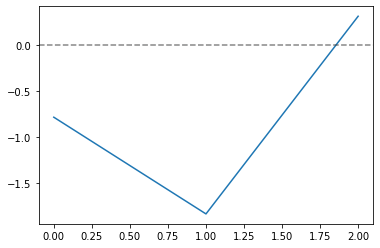

In [53]:
# feature selection !

'''
LASSO, short for Least Absolute Shrinkage and Selection Operator, 
is a statistical formula whose main purpose is the feature 
selection and regularization of data models. 
(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
'''
from sklearn import linear_model

data3 = data3.fillna(0) 

y = data3.horsepower
x = data3[data3.columns[:3]]

clf = linear_model.Lasso(alpha=0.1)  
clf.fit(x,y)
                                            # clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
print(clf.coef_)
print(clf.intercept_)  #?
# ridge ?
plt.plot(range(3),clf.coef_)
#plt.ylim(-1, 1)
#plt.xlim(0,3)
plt.axhline(0, linestyle='dashed', color='xkcd:dark grey', alpha=0.6, marker='')

In [3]:
# ................................
# classification info
# ................................

# Actual Value
labels = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]

# Predicted Value
predictions = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]
# ................................
# 0- email is NOT spam (negative)
# 1- email is spam (positive)
# ................................
#      predicted         predicted
# act (true positive) (false negative) 
# act (false positive) (true negative)
# ................................
# Accuracy = (true poseitive + true negative) / TOTAL
# precision = (true positive) / (true positive + false positive)
from sklearn.metrics import accuracy_score
print(accuracy_score(labels , predictions)*100)

# Recall  A case when Accuracy can be misleading
# recall = true positive / (true positive + false negative)
from sklearn.metrics import recall_score
print(recall_score(labels,predictions))

# Precision A Case when Recall Score can be misleading
# precision = true positive / true positive + falsepositive
from sklearn.metrics import precision_score
print(precision_score(labels,predictions)*100)

# F1 Score depends on both the Recall and Precision, it is the harmonic mean of both the values.#$
# F1 score = pricision * recall / precision + recall 
from sklearn.metrics import f1_score
print(f1_score(labels, predictions))

30.0
0.42857142857142855
50.0
0.4615384615384615


In [18]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split

bcd = datasets.load_breast_cancer()
bcdDF = pd.DataFrame(bcd.data)
x = bcd.data
y = bcd.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 42, stratify = y)


knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train, y_train)
knn.score(x_test,y_test)
y_pred = knn.predict(x_test)
# ................................
# ................................
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred),
classification_report(y_test, y_pred))

[[ 57   7]
 [  5 102]]               precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.94      0.95      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.985981308411215


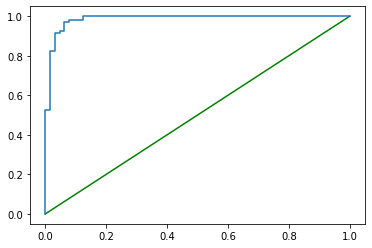

In [14]:
# ................................
# ROC curve
# ................................
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
 
log = LogisticRegression()
log.fit(x_train, y_train)

y_pred = log.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

y_proba = log.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
print(roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], c = 'g')
plt.plot(fpr, tpr)
plt.show()

In [23]:
# HyperParameter Tuning

# Grid search cross-validation
from sklearn.model_selection import GridSearchCV

Hparams = {'n_neighbors':np.arange(1,50)}

knn_cv = GridSearchCV(knn,Hparams, cv = 5)
knn_cv.fit(x_train, y_train)

print(knn_cv.best_params_, knn_cv.best_score_)

{'n_neighbors': 6} 0.9498417721518987


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
Hparams = {'max_depth':[None,5],
           'max_features': randint(1,9),
           'min_samples_leaf':randint(1,9)}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, Hparams, cv = 5)
tree_cv.fit(x_train, y_train)
print(tree_cv.best_params_)
print(tree_cv.best_score_)

{'max_depth': None, 'max_features': 2, 'min_samples_leaf': 6}
0.9347468354430379


In [46]:
# kmeans 
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km.fit(iris.data)
yp = km.predict(iris.data)
print(list(zip(iris.target,yp)))

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (1, 0), (1, 0), (1, 2), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 2), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (2, 2), (2, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 0), (2, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 0), (2, 2), (2, 0), (2, 2), (2, 0), (2, 2),